<a href="https://colab.research.google.com/github/pavana-kp/Mini-Project/blob/main/pavanaminiprojectml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 805 µs (started: 2021-05-24 13:49:13 +00:00)


In [2]:
!pip install bing_image_downloader


time: 3.24 s (started: 2021-05-24 13:49:22 +00:00)


In [3]:
!mkdir images

time: 128 ms (started: 2021-05-24 13:49:52 +00:00)


In [43]:
from bing_image_downloader import downloader
downloader.download("lavender",limit=40,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 6 Images on Page 1.


[%] Downloading Image #1 from https://www.hdwallpapers.in/download/lupine_lavender_flowers_during_sun_rise_california_hd_flowers-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://sieuimba.com/wp-content/uploads/2015/10/57.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.bouquetweddingflower.com/wp-content/uploads/2012/12/lavender-herb-bouquet.jpg?936291
[%] File Downloaded !

[%] Downloading Image #4 from https://images.designtrends.com/wp-content/uploads/2016/03/04090718/Well-Purple-Bathroom-Design.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.weddingbee.com/pics/192437/bcd6e82a28d54162844f0f7a6a12e9d9--wedding-cake-icing-lavender-wedding-cakes.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn.weddingbee.com/pics/192437/aubergine-560x859.jpg
[%] File Downloaded !



[!!]Indexing page: 2

[%] Indexed 6 Images on Page 2.


[%] Downloading Image 

In [6]:
from bing_image_downloader import downloader
downloader.download("orchid",limit=40,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 7 Images on Page 1.


[%] Downloading Image #1 from http://www.orchids.com/Assets/ProductImages/NF2547_12b.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://bestanimations.com/Nature/Flora/orchids/orchid-flower-animated-gif-5.gif
[%] File Downloaded !

[%] Downloading Image #3 from https://www.bing.com/th/id/OGC.81e409f7f02aaaa9dd8bc2aafe2b8f40?pid=1.7&amp;rurl=https%3a%2f%2fbestanimations.com%2fNature%2fFlora%2forchids%2forchid-flower-animated-gif-5.gif&amp;ehk=upncEnmAF0IBR%2fcPFgwM4NaJTDWhKDKO22HXJ5e2UOI%3d
[!] Issue getting: https://www.bing.com/th/id/OGC.81e409f7f02aaaa9dd8bc2aafe2b8f40?pid=1.7&amp;rurl=https%3a%2f%2fbestanimations.com%2fNature%2fFlora%2forchids%2forchid-flower-animated-gif-5.gif&amp;ehk=upncEnmAF0IBR%2fcPFgwM4NaJTDWhKDKO22HXJ5e2UOI%3d
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #3 from http://www.littlebcakes.com/wp-content/uploads/2013/08/Owl-Birthday-Cake-Ideas.jpg
[%] File Downloaded !

[%] Dow

In [7]:
from bing_image_downloader import downloader
downloader.download("tulips",limit=40,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 6 Images on Page 1.


[%] Downloading Image #1 from http://www.hdwallpapers.in/download/red_tulip_rain-1600x900.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.phipps.conservatory.org/images/made/assets/images/as_art_image/1983_Spring_East_1050_1607_29_s_c1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://1075koolfm.com/wp-content/uploads/2017/04/a4df4dc41d66261f4a5d54b91973fa9d.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.hdwallpapers.in/download/sony_xperia_z_stock_blue_flower-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://wallpapershome.com/images/wallpapers/spring-flowers-1440x2560-4k-hd-wallpaper-summer-flowers-summer-sun-10140.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.hdwallpapers.in/download/closeup_photo_of_sunflower_with_shallow_focus_red_and_yellow_sky_during_sunset_4k_hd_flowers-1280x720.jpg
[%] File Downloaded !



[!!]Index

In [73]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target = []
images = []
flat_data = []
DATADIR = '/content/images'
CATEGORIES = ['lavender','orchid','tulips']

time: 4.63 ms (started: 2021-05-24 16:21:24 +00:00)


In [67]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))

time: 4.19 s (started: 2021-05-24 16:15:19 +00:00)


In [ ]:
import numpy as np
img_resized= resize(img_array,(150,150,3))
flat_data.append(img_resized.flatten())
images.append(img_resized)
target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data,target,test_size=0.3,random_state=100)

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid =[
             {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':['0.001,0.0001'],'kernel':['rbf']},
]

time: 4.71 ms (started: 2021-05-24 16:19:10 +00:00)


In [ ]:
svc = svm.SVC(probability=True)
clf= GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred
y_test
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)
confusion_matrix(y_pred,y_test) 

In [26]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))
model=pickle.load(open('img_model.p','rb'))

time: 4.5 ms (started: 2021-05-24 15:28:48 +00:00)


Enter your URLhttps://www.gardeningknowhow.com/wp-content/uploads/2009/10/tulips1.jpg
(1385, 1386, 3)


AttributeError: ignored

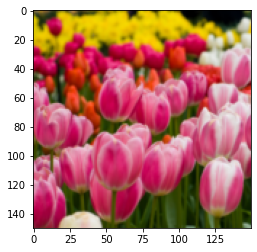

time: 15.7 s (started: 2021-05-24 15:59:32 +00:00)


In [41]:
flat_data=[]
url=input('Enter your URL')
img = imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [ ]:
_